In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# only label feature(deprecated due to integation into fuzzy label feature)

## sst(deprecated due to unreasonable shot setting(mod 4))

In [24]:
sst_result = '../output/results_KB_only_label_feature_sst2.csv'
sst_df = pd.read_csv(sst_result)

method_set = sst_df['method'].unique().tolist()
n_train_shot_set = sst_df['n_train_shot'].unique().tolist()
seed_set = sst_df['seed'].unique().tolist()

avg_dict = {}
std_dict = {}
for method in method_set:
    avg_dict[method] = []
    std_dict[method] = []
    for n_train_shot in n_train_shot_set:
        choosed_acc = sst_df[(sst_df['method'] == method) & (sst_df['n_train_shot'] == n_train_shot)]['acc']
        avg_dict[method].append(choosed_acc.mean())
        std_dict[method].append(choosed_acc.std())
print(avg_dict)
print(std_dict)

{'Nearest Neighbors': [0.7640625, 0.79453125, 0.79296875, 0.77265625, 0.79375], 'Linear SVM': [0.7765625, 0.79375, 0.82578125, 0.8296875, 0.834375], 'Gaussian Process': [0.7296875, 0.78046875, 0.81640625, 0.81640625, 0.82109375], 'Decision Tree': [0.7125, 0.74296875, 0.76015625, 0.75390625, 0.7703125], 'MLP': [0.77265625, 0.821875, 0.8265625, 0.81796875, 0.821875], 'AdaBoost': [0.70703125, 0.771875, 0.7515625, 0.77421875, 0.80234375], 'Naive Bayes': [0.7328125, 0.7265625, 0.7328125, 0.7265625, 0.73203125], 'Logistic Regression': [0.7921875, 0.81015625, 0.82734375, 0.82890625, 0.83046875]}
{'Nearest Neighbors': [0.07677545320506907, 0.02742732762740931, 0.024237643839825893, 0.03249474116107097, 0.016434128099970805], 'Linear SVM': [0.05365942131717179, 0.03647692978102735, 0.018855497478354955, 0.00899286283845417, 0.0059241214406652734], 'Gaussian Process': [0.08144320478387837, 0.05013105383486118, 0.009959022487485907, 0.009568319307746789, 0.00427908248050911], 'Decision Tree': [0.

In [31]:
icl_sst_result = '../output/results_icl_sst2.csv'
icl_sst_df = pd.read_csv(icl_sst_result)

icl_n_train_shot_set = icl_sst_df['n_train_shot'].unique().tolist()

icl_avg = []
icl_std = []
for n_train_shot in icl_n_train_shot_set:
    choosed_acc = icl_sst_df[icl_sst_df['n_train_shot'] == n_train_shot]['acc']
    icl_avg.append(choosed_acc.mean())
    icl_std.append(choosed_acc.std())
print(icl_avg)
print(icl_std)

# adjust icl result
remain_num = 3
icl_avg = icl_avg[:remain_num] + [icl_avg[remain_num - 1]]*(len(icl_avg) - remain_num)
icl_std = icl_std[:remain_num] + [icl_std[remain_num - 1]]*(len(icl_std) - remain_num)
print(icl_avg)
print(icl_std)

[0.7265625, 0.70390625, 0.81328125, 0.86171875, 0.8625, 0.86171875]
[0.0, 0.06509505144522316, 0.054225166226981265, 0.05127464632222001, 0.04119195727020021, 0.03989350447402121]
[0.7265625, 0.70390625, 0.81328125, 0.81328125, 0.81328125, 0.81328125]
[0.0, 0.06509505144522316, 0.054225166226981265, 0.054225166226981265, 0.054225166226981265, 0.054225166226981265]


C:\Users\USER\AppData\Local\Temp\ipykernel_16400\159746397.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'LLM as KB with only label feature and different classification')

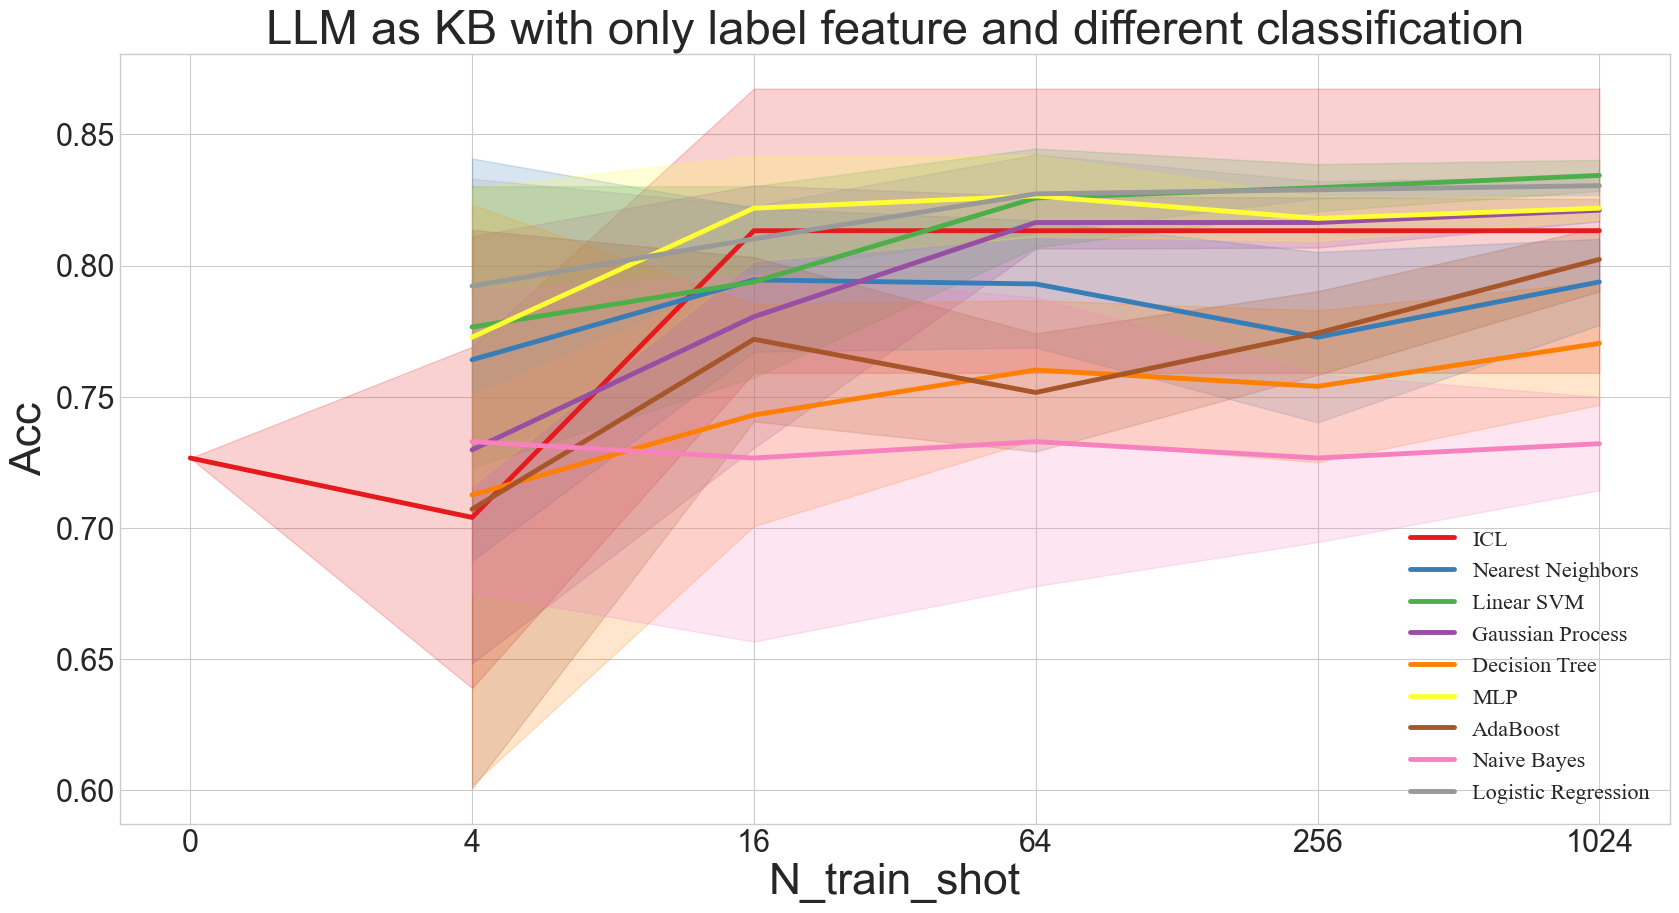

In [32]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

fig=plt.figure(figsize=(20,10))

def draw_line(name_of_alg, color_index, avg, std, with_zero=False):
    color=palette(color_index)
    r1 = list(map(lambda x: x[0]-x[1], zip(avg, std)))#上方差
    r2 = list(map(lambda x: x[0]+x[1], zip(avg, std)))#下方差
    plt.plot(range(0 if with_zero else 1,len(n_train_shot_set)+1), avg, color=color,label=name_of_alg,linewidth=3.5)
    plt.fill_between(range(0 if with_zero else 1,len(n_train_shot_set)+1), r1, r2, color=color, alpha=0.2)

draw_line('ICL',0, icl_avg, icl_std, with_zero=True)
for i, method in enumerate(method_set, start=1):
    draw_line(method,i, avg_dict[method], std_dict[method])

plt.xticks(range(len(n_train_shot_set)+1), labels=[0]+[i for i in n_train_shot_set],fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('N_train_shot',fontsize=32)
plt.ylabel('Acc',fontsize=32)
plt.legend(loc='lower right',prop=font1)
plt.title("LLM as KB with only label feature and different classification",fontsize=34)

## all dataset(deprecated due to unreasonable shot setting(mod 4))

In [62]:
DATASETS = ['sst2', 'subj', 'mpqa', 'agnews', 'cb', 'cr', 'dbpedia', 'mr', 'rte', 'trec']
MAX_ICL_SHOTS = [16, 8, 32, 2, 2, 8, 1, 8, 4, 8]
all_shots = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
fuzzy_label_shots = [4, 16, 64, 256, 1024]
# KB results
results = [f'../output/only_label/results_KB_only_label_feature_{dataset}.csv' for dataset in DATASETS]
result_dfs = [pd.read_csv(result) for result in results]


avg_dicts = []
std_dicts = []
for df in result_dfs:
    method_set = df['method'].unique().tolist()
    n_train_shot_set = df['n_train_shot'].unique().tolist()
    seed_set = df['seed'].unique().tolist()

    assert n_train_shot_set == fuzzy_label_shots

    avg_dict = {}
    std_dict = {}
    for method in method_set:
        avg_dict[method] = []
        std_dict[method] = []
        for n_train_shot in n_train_shot_set:
            choosed_acc = df[(df['method'] == method) & (df['n_train_shot'] == n_train_shot)]['acc']
            avg_dict[method].append(choosed_acc.mean())
            std_dict[method].append(choosed_acc.std())
    avg_dicts.append(avg_dict)
    std_dicts.append(std_dict)

# icl results
icl_results = [f'../output/icl/results_icl_{dataset}.csv' for dataset in DATASETS]
icl_dfs = [pd.read_csv(icl_result) for icl_result in icl_results]

icl_avgs = []
icl_stds = []
for index, icl_df in enumerate(icl_dfs):
    icl_n_train_shot_set = icl_df['n_train_shot'].unique().tolist()

    icl_avg = []
    icl_std = []
    for n_train_shot in icl_n_train_shot_set:
        choosed_acc = icl_df[icl_df['n_train_shot'] == n_train_shot]['acc']
        icl_avg.append(choosed_acc.mean())
        icl_std.append(choosed_acc.std())

    # adjust icl result
    remain_num = len(icl_n_train_shot_set)
    icl_avg = icl_avg + [icl_avg[- 1]]*(len(all_shots) - remain_num)
    icl_std = icl_std + [icl_std[- 1]]*(len(all_shots) - remain_num)
    icl_avgs.append(icl_avg)
    icl_stds.append(icl_std)

C:\Users\USER\AppData\Local\Temp\ipykernel_16400\1417608650.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


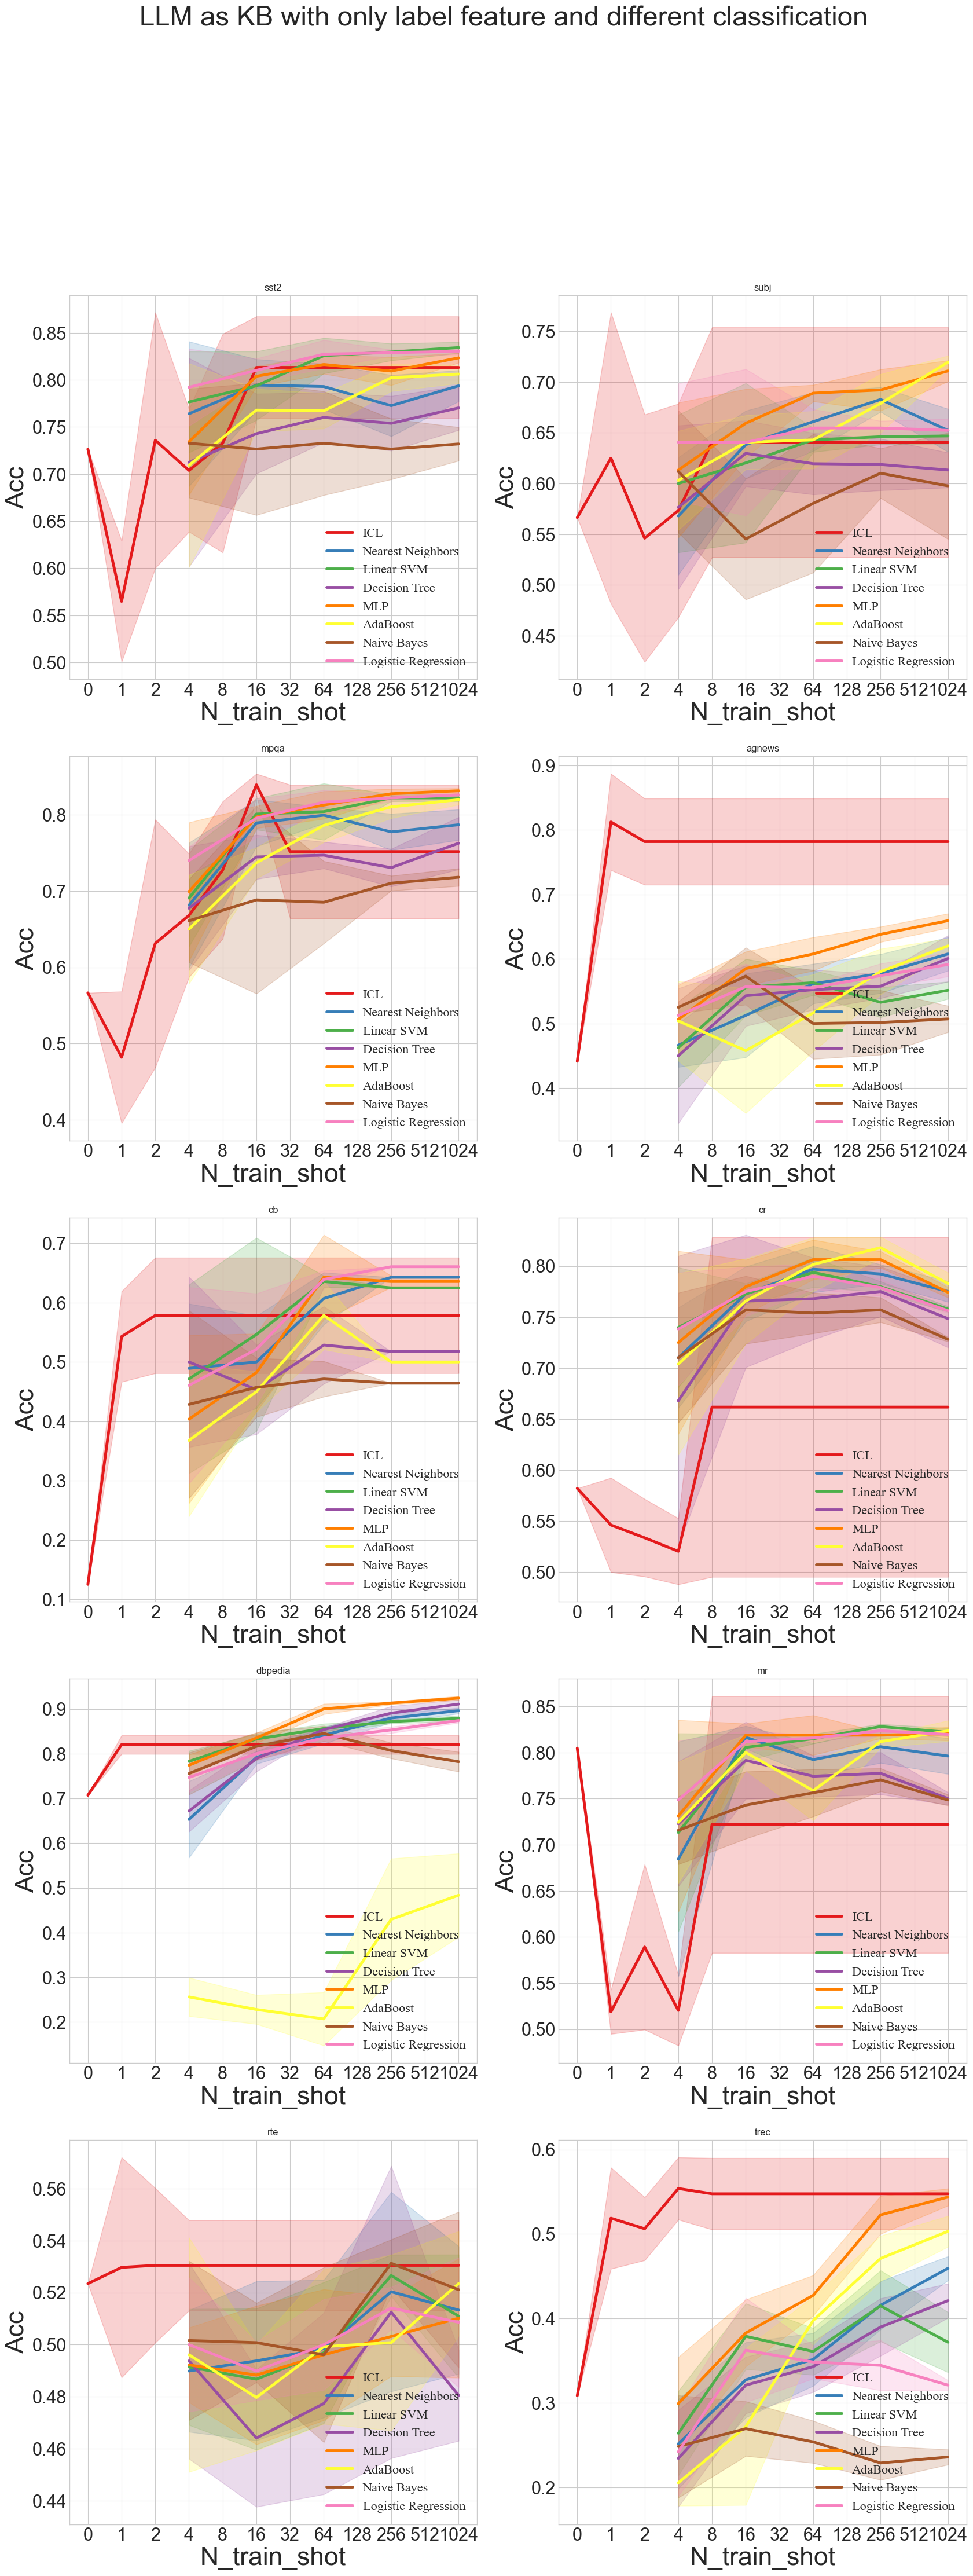

In [63]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

fig=plt.figure(figsize=(20,50))

for index, dataset in enumerate(DATASETS):
    plt.subplot(5, 2, index + 1)
    
    avg_dict = avg_dicts[index]
    std_dict = std_dicts[index]
    icl_avg = icl_avgs[index]
    icl_std = icl_stds[index]
    def draw_line(name_of_alg, color_index, avg, std, is_icl=False):
        if not is_icl:
            choosed_shots = fuzzy_label_shots
        else:
            choosed_shots = all_shots
        color=palette(color_index)
        r1 = list(map(lambda x: x[0]-x[1], zip(avg, std)))#上方差
        r2 = list(map(lambda x: x[0]+x[1], zip(avg, std)))#下方差
        plt.plot([all_shots.index(_shot) for _shot in choosed_shots], avg, color=color,label=name_of_alg,linewidth=3.5)
        plt.fill_between([all_shots.index(_shot) for _shot in choosed_shots], r1, r2, color=color, alpha=0.2)

    draw_line('ICL',0, icl_avg, icl_std, is_icl=True)
    for i, method in enumerate(method_set, start=1):
        draw_line(method,i, avg_dict[method], std_dict[method])

    plt.xticks(range(len(all_shots)), labels=all_shots,fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlabel('N_train_shot',fontsize=32)
    plt.ylabel('Acc',fontsize=32)
    plt.legend(loc='lower right',prop=font1)
    plt.title(f"{dataset}")
plt.suptitle("LLM as KB with only label feature and different classification",fontsize=34)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16400\1894798635.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


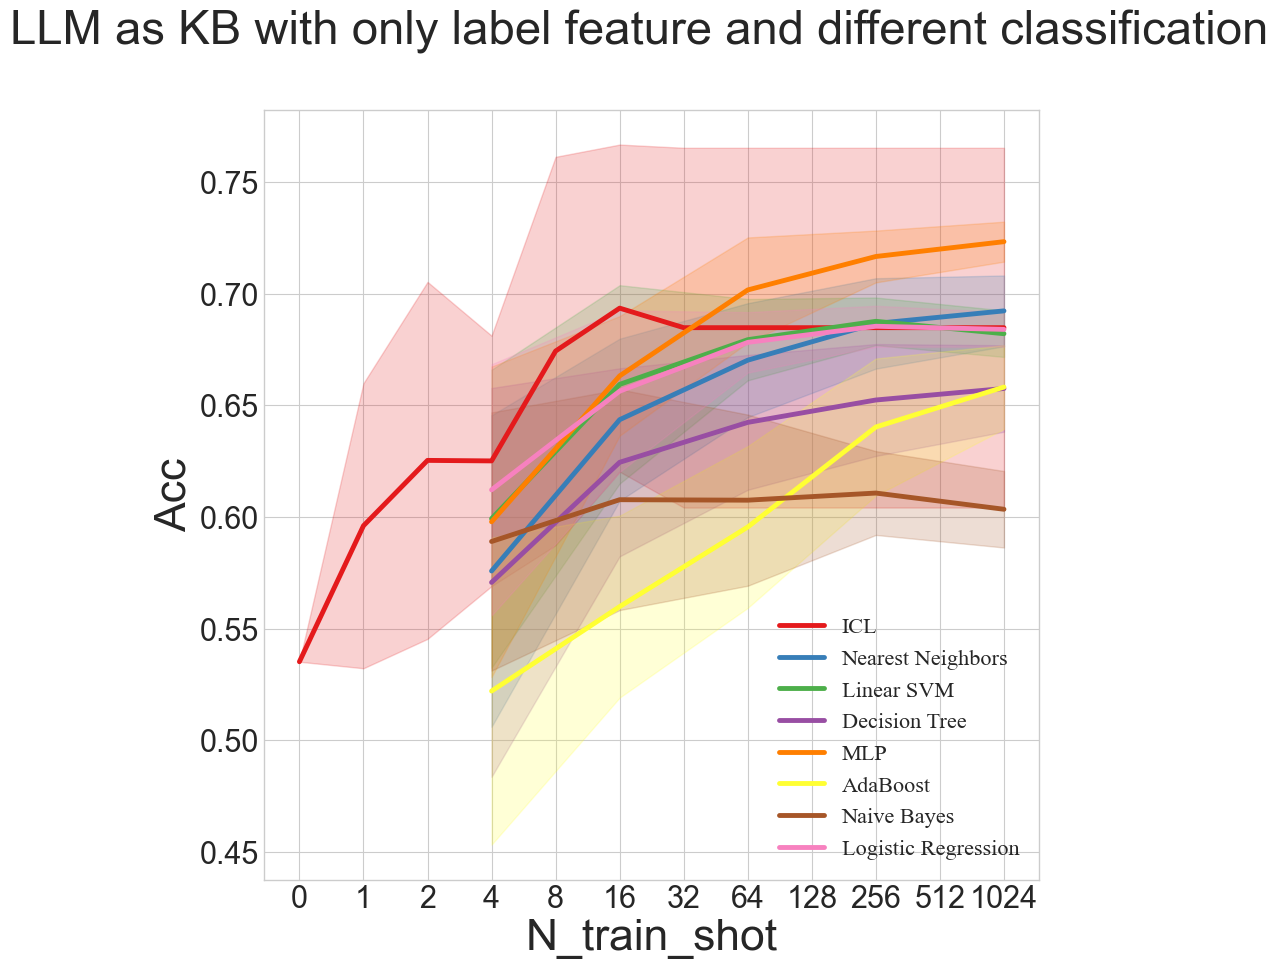

In [65]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

fig=plt.figure(figsize=(10,10))

def avg_on_dataset(metrics_list):
    return np.array(metrics_list).mean(axis=0)
avg_dict = {method: avg_on_dataset([_avgdict[method] for _avgdict in avg_dicts]) for method in method_set}
std_dict = {method: avg_on_dataset([_stddict[method] for _stddict in std_dicts]) for method in method_set}
icl_avg = avg_on_dataset(icl_avgs)
icl_std = avg_on_dataset(icl_stds)
def draw_line(name_of_alg, color_index, avg, std, is_icl=False):
    if not is_icl:
        choosed_shots = fuzzy_label_shots
    else:
        choosed_shots = all_shots
    color=palette(color_index)
    r1 = list(map(lambda x: x[0]-x[1], zip(avg, std)))#上方差
    r2 = list(map(lambda x: x[0]+x[1], zip(avg, std)))#下方差
    plt.plot([all_shots.index(_shot) for _shot in choosed_shots], avg, color=color,label=name_of_alg,linewidth=3.5)
    plt.fill_between([all_shots.index(_shot) for _shot in choosed_shots], r1, r2, color=color, alpha=0.2)

draw_line('ICL',0, icl_avg, icl_std, is_icl=True)
for i, method in enumerate(method_set, start=1):
    draw_line(method,i, avg_dict[method], std_dict[method])

plt.xticks(range(len(all_shots)), labels=all_shots,fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('N_train_shot',fontsize=32)
plt.ylabel('Acc',fontsize=32)
plt.legend(loc='lower right',prop=font1)
plt.suptitle("LLM as KB with only label feature and different classification",fontsize=34)
plt.show()

# fuzzy label

In [76]:
DATASETS = ['sst2', 'subj', 'mpqa', 'agnews', 'cb', 'cr', 'dbpedia', 'mr', 'rte', 'trec']
MAX_ICL_SHOTS = [16, 8, 32, 2, 2, 8, 1, 8, 4, 8]
all_shots = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
fuzzy_label_shots = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
FUZZY_K = [1, 10,100,1000]
# KB results
avg_dicts_across_k = {}
std_dicts_across_k = {}
for k in FUZZY_K:
    # if k == 1 :
    #     results = [f'../output/only_label/results_KB_only_label_feature_{dataset}.csv' for dataset in DATASETS]
    # else:
    #     results = [f'../output/fuzzy_label/results_KB_fuzzy_label_{k}_feature_{dataset}.csv' for dataset in DATASETS]
    results = [f'../output/fuzzy_label/results_KB_fuzzy_label_{k}_feature_{dataset}.csv' for dataset in DATASETS]
    result_dfs = [pd.read_csv(result) for result in results]


    avg_dicts = []
    std_dicts = []
    for df in result_dfs:
        method_set = df['method'].unique().tolist()
        n_train_shot_set = df['n_train_shot'].unique().tolist()
        seed_set = df['seed'].unique().tolist()

        assert n_train_shot_set == fuzzy_label_shots, (n_train_shot_set, fuzzy_label_shots)

        avg_dict = {}
        std_dict = {}
        for method in method_set:
            avg_dict[method] = []
            std_dict[method] = []
            for n_train_shot in n_train_shot_set:
                choosed_acc = df[(df['method'] == method) & (df['n_train_shot'] == n_train_shot)]['acc']
                avg_dict[method].append(choosed_acc.mean())
                std_dict[method].append(choosed_acc.std())
        avg_dicts.append(avg_dict)
        std_dicts.append(std_dict)
    avg_dicts_across_k[k] = avg_dicts
    std_dicts_across_k[k] = std_dicts


# icl results
icl_results = [f'../output/icl/results_icl_{dataset}.csv' for dataset in DATASETS]
icl_dfs = [pd.read_csv(icl_result) for icl_result in icl_results]

icl_avgs = []
icl_stds = []
for index, icl_df in enumerate(icl_dfs):
    icl_n_train_shot_set = icl_df['n_train_shot'].unique().tolist()

    assert icl_n_train_shot_set == all_shots[:len(icl_n_train_shot_set)]

    icl_avg = []
    icl_std = []
    for n_train_shot in icl_n_train_shot_set:
        choosed_acc = icl_df[icl_df['n_train_shot'] == n_train_shot]['acc']
        icl_avg.append(choosed_acc.mean())
        icl_std.append(choosed_acc.std())

    # adjust icl result
    remain_num = len(icl_n_train_shot_set)
    icl_avg = icl_avg + [icl_avg[- 1]]*(len(all_shots) - remain_num)
    icl_std = icl_std + [icl_std[- 1]]*(len(all_shots) - remain_num)
    icl_avgs.append(icl_avg)
    icl_stds.append(icl_std)

C:\Users\USER\AppData\Local\Temp\ipykernel_16400\3629381083.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


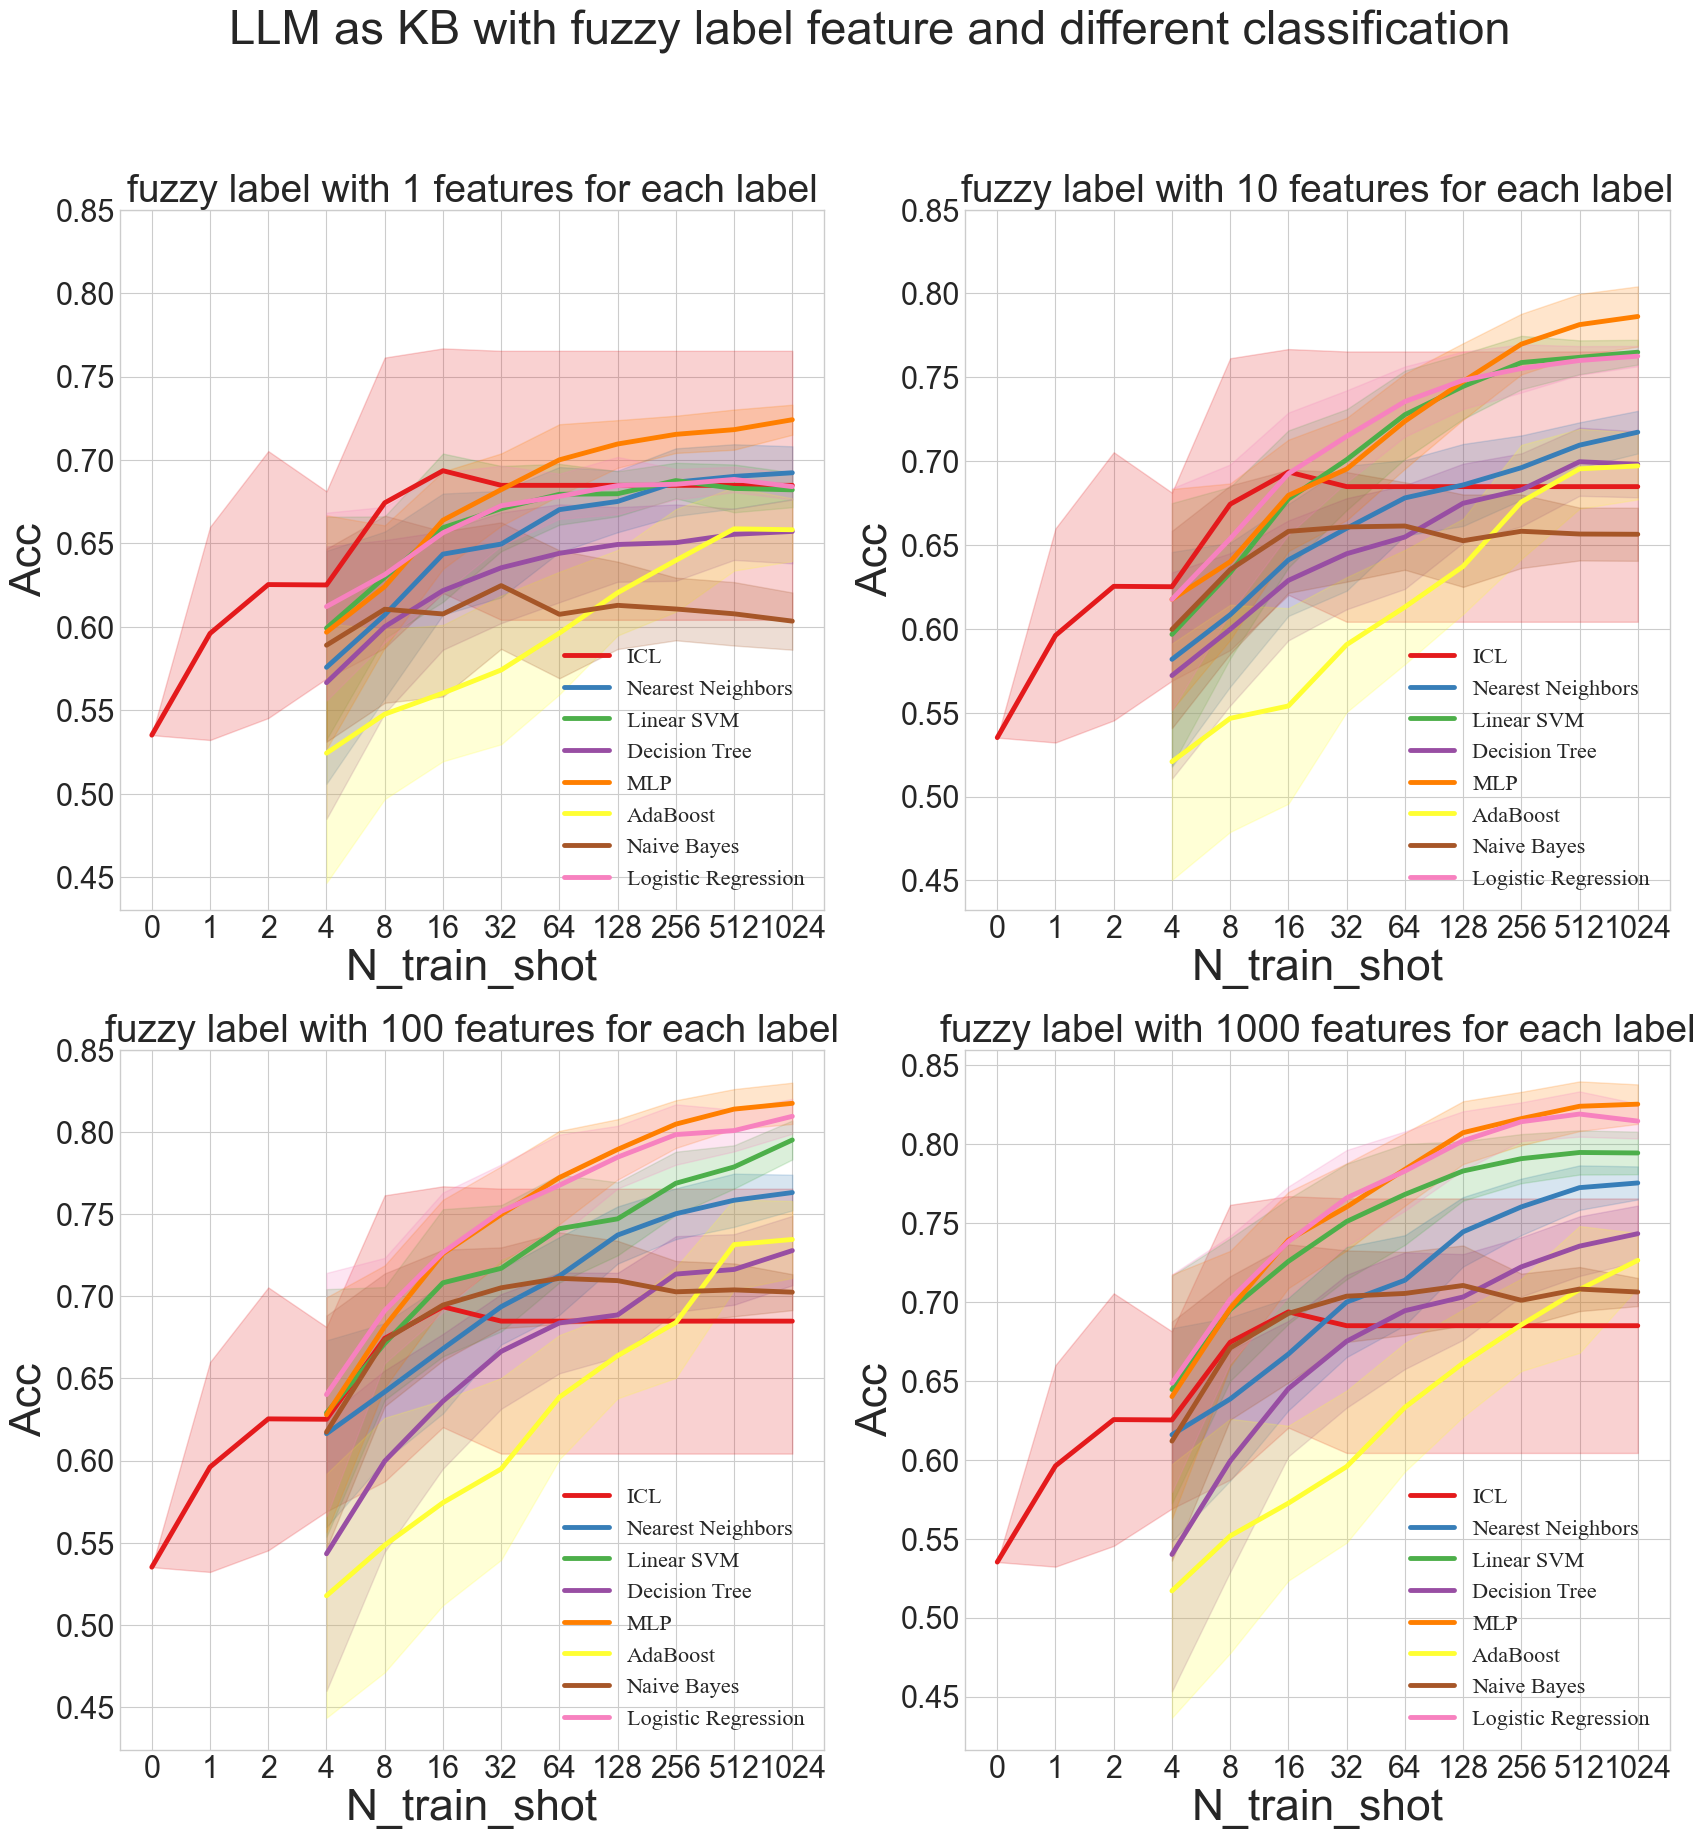

In [77]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

fig=plt.figure(figsize=(20,20))

for index, k in enumerate(FUZZY_K):
    plt.subplot(2, 2, index + 1)

    def avg_on_dataset(metrics_list):
        return np.array(metrics_list).mean(axis=0)
    avg_dicts = avg_dicts_across_k[k]
    std_dicts = std_dicts_across_k[k]
    avg_dict = {method: avg_on_dataset([_avgdict[method] for _avgdict in avg_dicts]) for method in method_set}
    std_dict = {method: avg_on_dataset([_stddict[method] for _stddict in std_dicts]) for method in method_set}

    icl_avg = avg_on_dataset(icl_avgs)
    icl_std = avg_on_dataset(icl_stds)
    def draw_line(name_of_alg, color_index, avg, std, is_icl=False):
        if not is_icl:
            choosed_shots = fuzzy_label_shots
        else:
            choosed_shots = all_shots
        color=palette(color_index)
        r1 = list(map(lambda x: x[0]-x[1], zip(avg, std)))#上方差
        r2 = list(map(lambda x: x[0]+x[1], zip(avg, std)))#下方差
        plt.plot([all_shots.index(_shot) for _shot in choosed_shots], avg, color=color,label=name_of_alg,linewidth=3.5)
        plt.fill_between([all_shots.index(_shot) for _shot in choosed_shots], r1, r2, color=color, alpha=0.2)

    draw_line('ICL',0, icl_avg, icl_std, is_icl=True)
    for i, method in enumerate(method_set, start=1):
        draw_line(method,i, avg_dict[method], std_dict[method])

    plt.xticks(range(len(all_shots)), labels=all_shots,fontsize=22)
    plt.yticks(np.arange(start=0.45, stop=0.9,step=0.05), fontsize=22)
    plt.xlabel('N_train_shot',fontsize=32)
    plt.ylabel('Acc',fontsize=32)
    plt.legend(loc='lower right',prop=font1)
    plt.title(f"fuzzy label with {k} features for each label", fontsize=28)
plt.suptitle("LLM as KB with fuzzy label feature and different classification",fontsize=34)
plt.show()